In [1]:
library(ggplot2)

## HISTOGRAMS

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


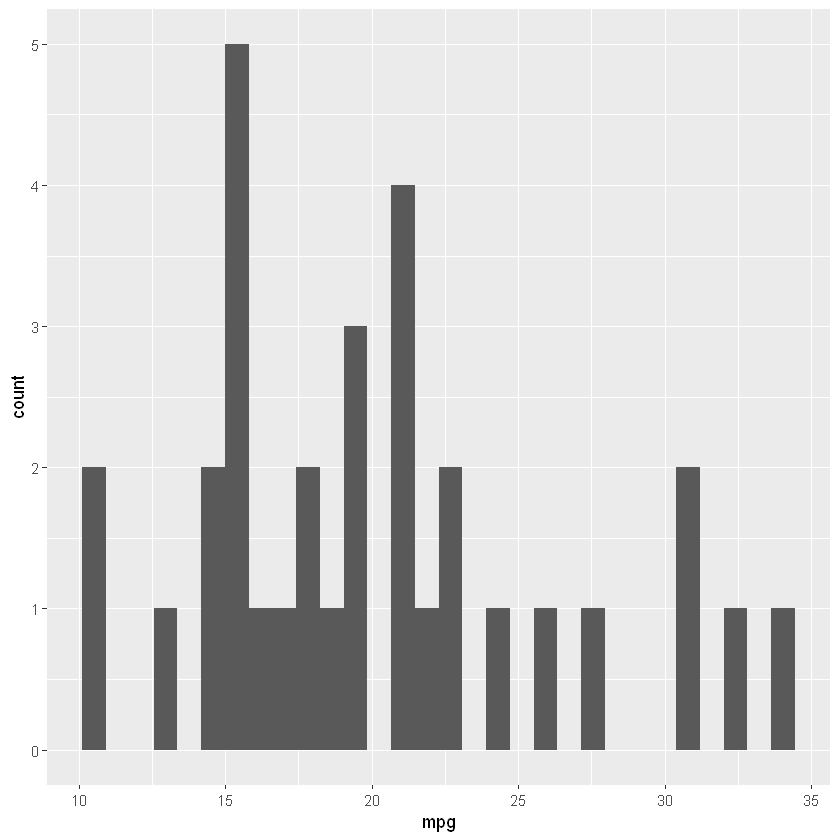

In [2]:
# 1 - Make a univariate histogram
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram()

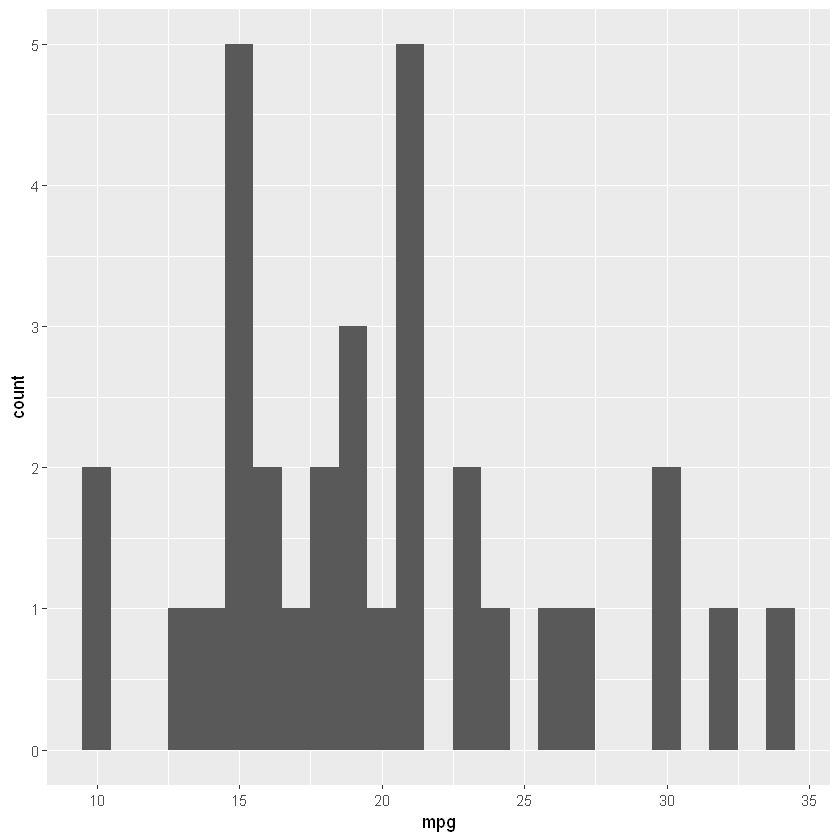

In [3]:
# 2 - Plot 1, plus set binwidth to 1 in the geom layer, default y = ..count..
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(binwidth = 1)

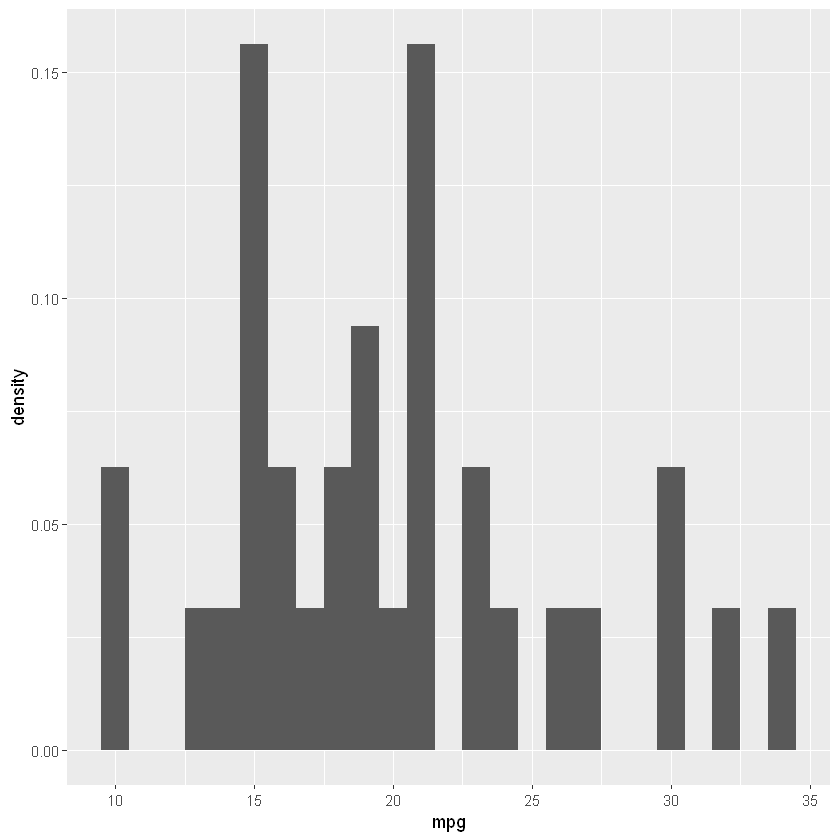

In [4]:
# 3 - Plot 2, plus MAP ..density.. to the y aesthetic (i.e. in a second aes() function)
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(aes(y = ..density..), binwidth = 1)

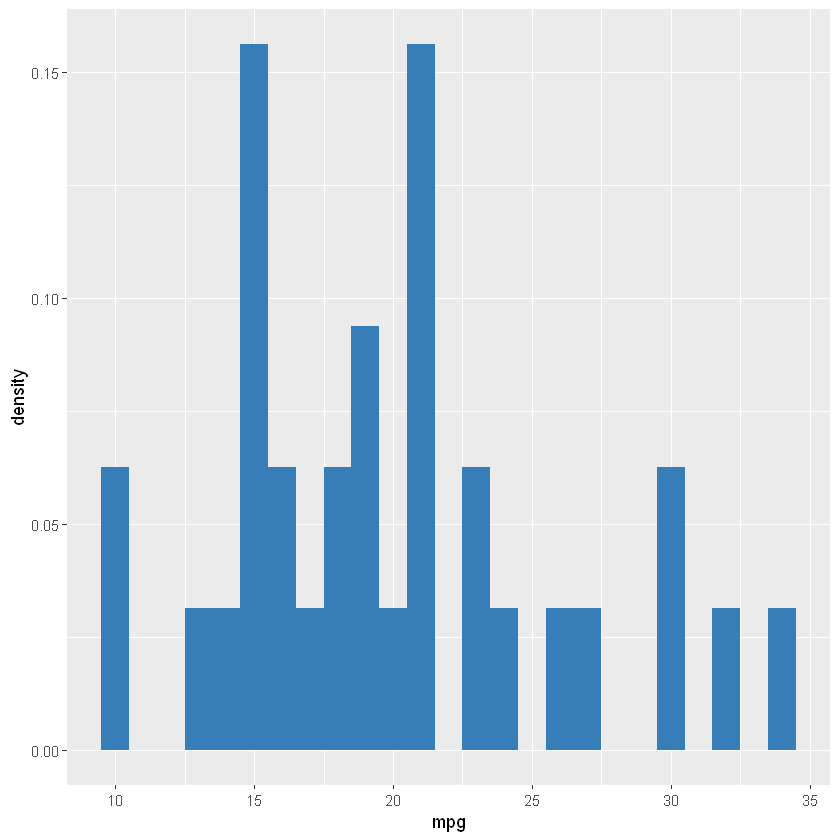

In [5]:
# 4 - plot 3, plus SET the fill attribute to "#377EB8"
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(aes(y = ..density..), binwidth = 1, fill = "#377EB8")

## OVERLAPPING HIST

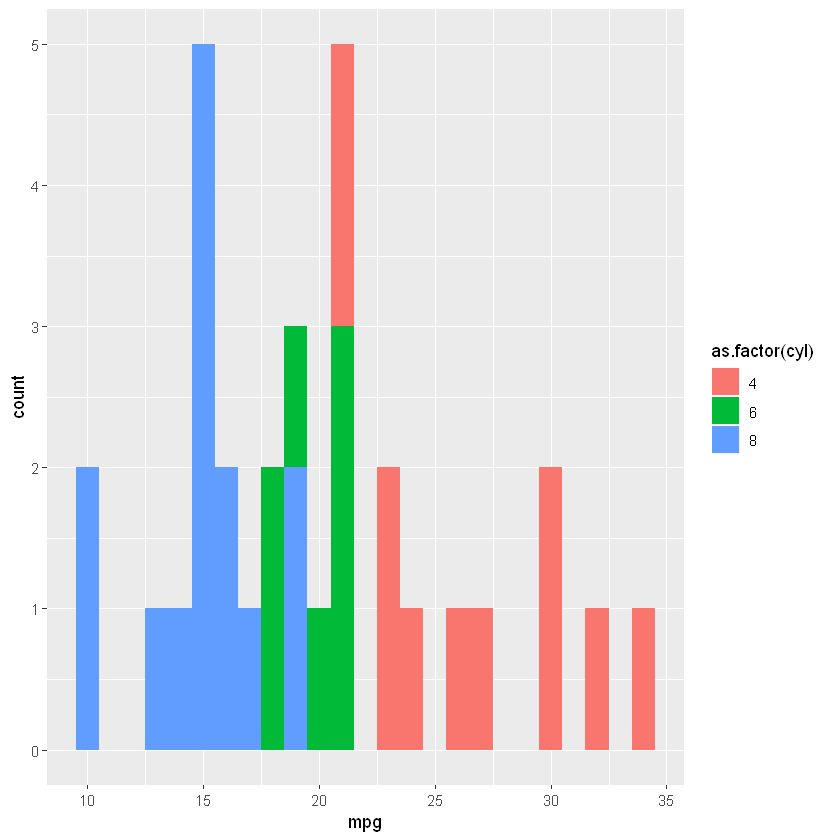

In [8]:
# A basic histogram, add coloring defined by cyl (default is stack)
ggplot(mtcars, aes(mpg, fill = as.factor(cyl))) +
  geom_histogram(binwidth = 1)

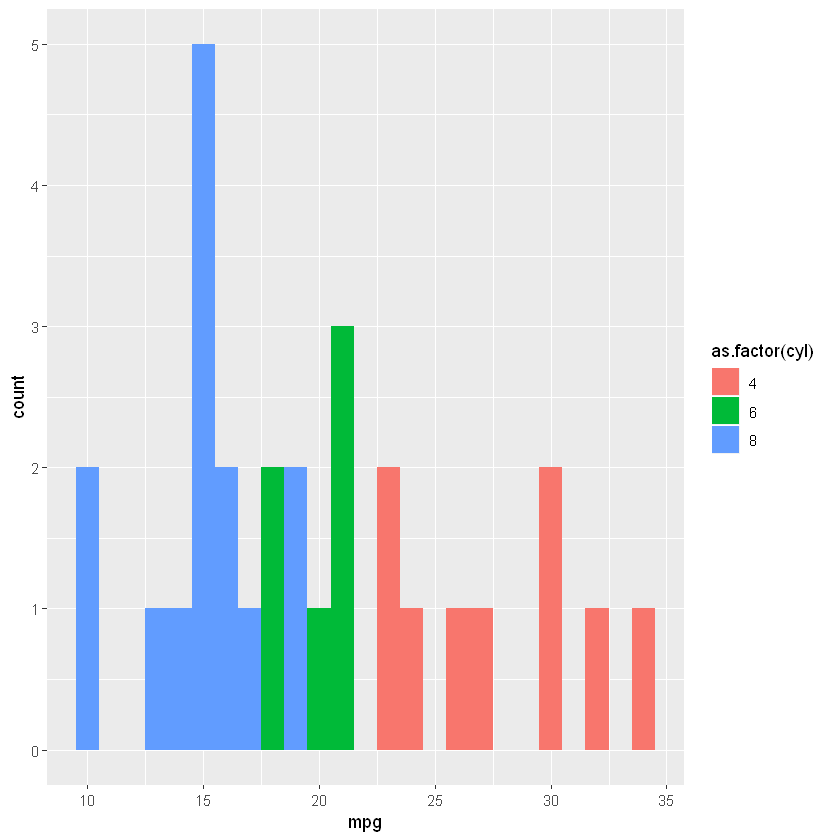

In [9]:
# Change position to identity
ggplot(mtcars, aes(mpg, fill = as.factor(cyl))) +
  geom_histogram(binwidth = 1, position = "identity")

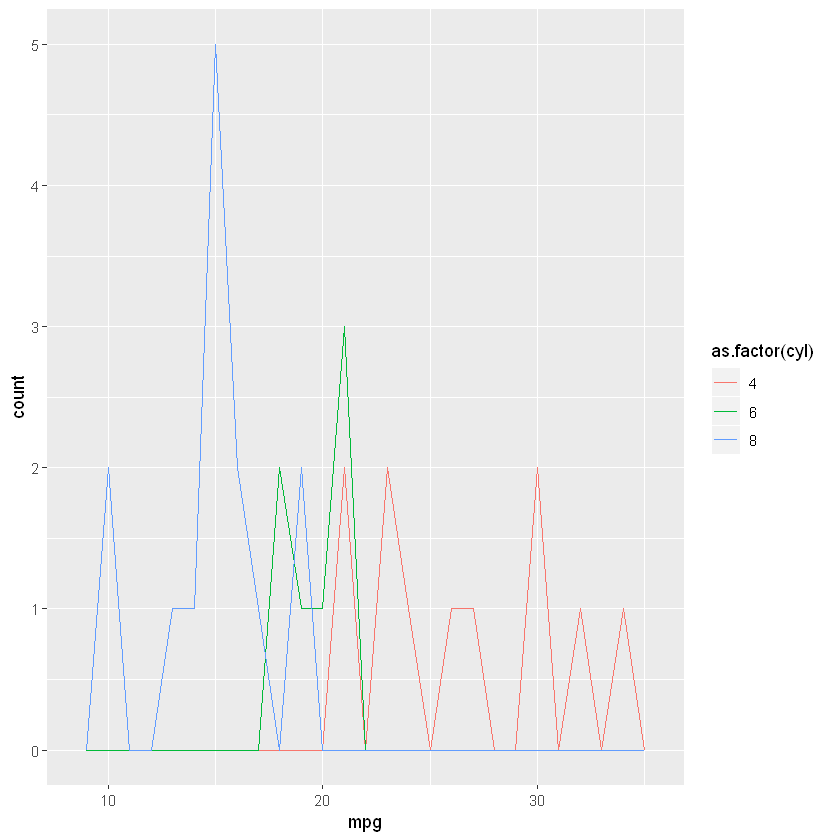

In [10]:
# Change geom to freqpoly (position is identity by default)
ggplot(mtcars, aes(mpg, col = as.factor(cyl))) +
  geom_freqpoly(binwidth = 1)

## OVERLAPPING BARPLOT

In [6]:
# There are also 'stack', 'fill', 'identity'
# Define posn_d with position_dodge()
posn_d <- position_dodge(width = 0.2)

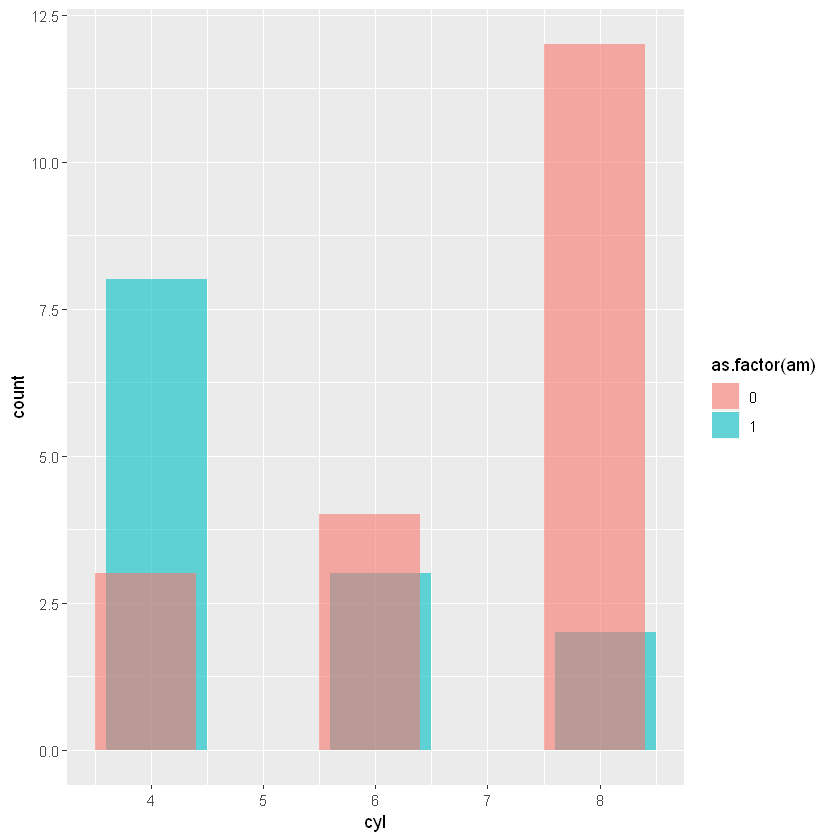

In [7]:
# 4 - Use posn_d as position and adjust alpha to 0.6
ggplot(mtcars, aes(x = cyl, fill = as.factor(am))) +
  geom_bar(position = posn_d, alpha = 0.6)

## BARPLOT WITH COLOR RAMP

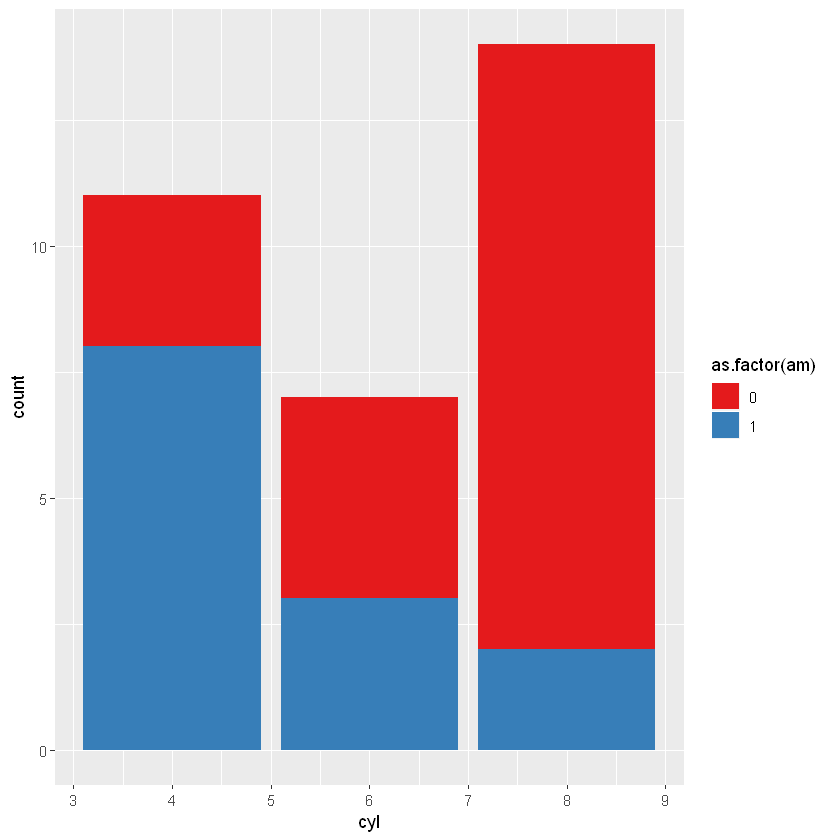

In [11]:
# Example of how to use a brewed color palette
ggplot(mtcars, aes(x = cyl, fill = as.factor(am))) +
  geom_bar() +
  scale_fill_brewer(palette = "Set1")

In [12]:
# Use str() on Vocab to check out the structure
library(readr)
Vocab <- read_csv("GSSvocab.csv")
str(Vocab)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  year = col_double(),
  gender = col_character(),
  nativeBorn = col_character(),
  ageGroup = col_character(),
  educGroup = col_character(),
  vocab = col_double(),
  age = col_double(),
  educ = col_double()
)


Classes 'tbl_df', 'tbl' and 'data.frame':	28867 obs. of  9 variables:
 $ X1        : num  1978 1978 1978 1978 1978 ...
 $ year      : num  1978 1978 1978 1978 1978 ...
 $ gender    : chr  "female" "female" "male" "female" ...
 $ nativeBorn: chr  "yes" "yes" "yes" "yes" ...
 $ ageGroup  : chr  "50-59" "60+" "30-39" "50-59" ...
 $ educGroup : chr  "12 yrs" "<12 yrs" "<12 yrs" "12 yrs" ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_double(),
  ..   year = col_double(),
  ..   gender = col_character(),
  ..   nativeBorn = col_character(),
  ..   ageGroup = col_character(),
  ..   educGroup = col_character(),
  ..   vocab = col_double(),
  ..   age = col_double(),
  ..   educ = col_double()
  .. )


Warning message:
"Removed 81 rows containing non-finite values (stat_count)."Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Blues is 9
Returning the palette you asked for with that many colors
"

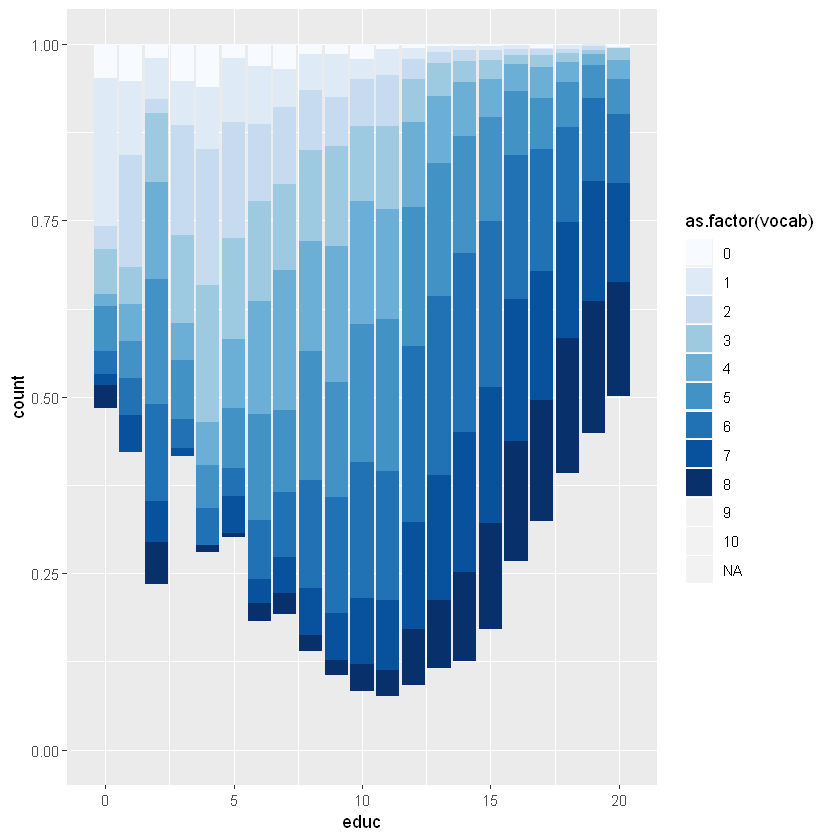

In [13]:
# Plot education on x and vocabulary on fill
# Use the default brewed color palette
ggplot(Vocab, aes(x = educ, fill = as.factor(vocab))) +
  geom_bar(position = "fill") +
  scale_fill_brewer()

=> Incomplete barplot

In [14]:
# Install package
library(RColorBrewer)

# Definition of a set of blue colors
blues <- brewer.pal(9, "Blues") # from the RColorBrewer package

[1] "#F7FBFF" "#E3EEF8" "#CFE1F2" "#B5D4E9" "#93C4DE" "#6BAED6" "#4A97C9"
 [8] "#2E7EBB" "#1664AB" "#084A92" "#08306B"

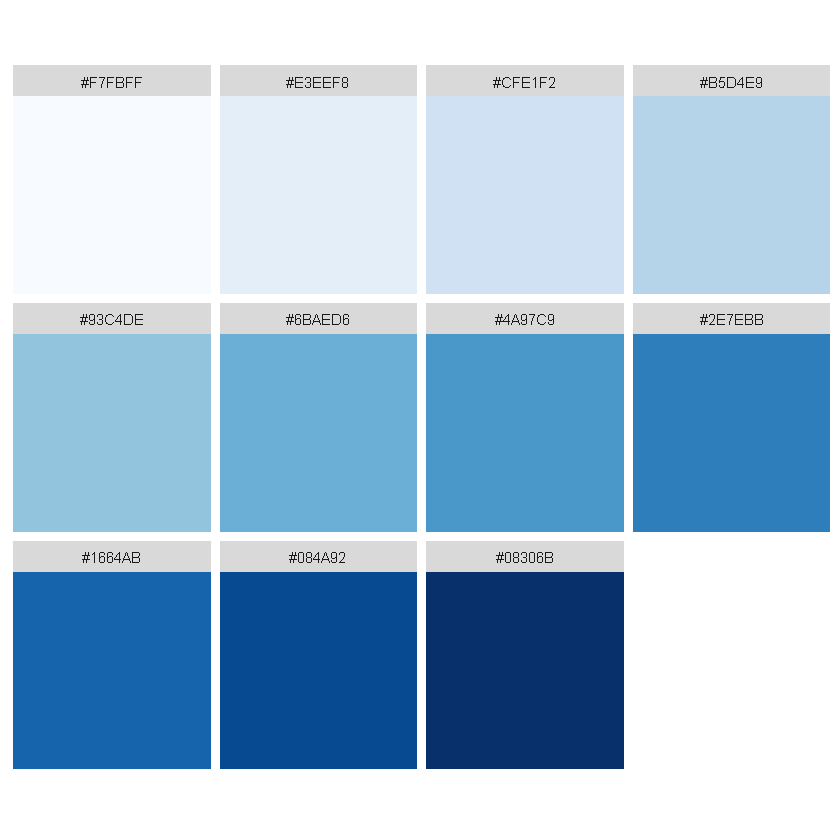

In [15]:
# 1 - Make a color range using colorRampPalette() and the set of blues
blue_range <- colorRampPalette(blues)
blue_range(11) # the newly extrapolated colours
munsell::plot_hex(blue_range(11)) # Quick and dirty plot

Warning message:
"Removed 81 rows containing non-finite values (stat_count)."

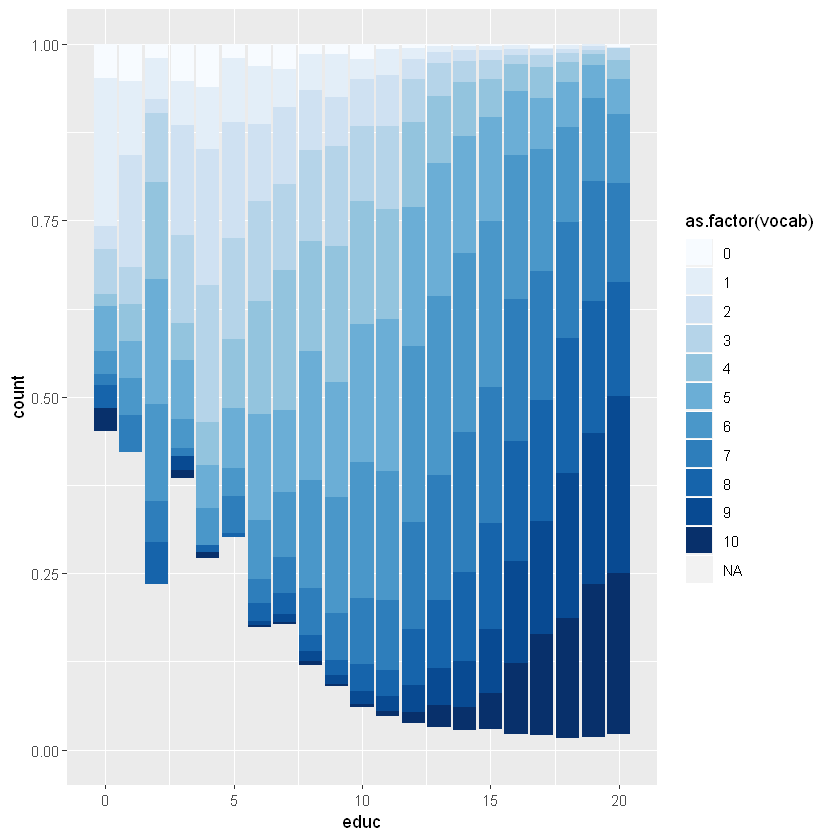

In [16]:
# 2 - Use blue_range to adjust the color of the bars, use scale_fill_manual()
ggplot(Vocab, aes(x = educ, fill = as.factor(vocab))) +
  geom_bar(position = "fill") +
  scale_fill_manual(values = blue_range(11))